# Multiple Linear Regression

In [165]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression ,Lasso , Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import warnings as wr
wr.filterwarnings('ignore')

# EDA Process

In [167]:
#performing EDA process 
#load the datasets
df=pd.read_csv('ToyotaCorolla _MLR.csv')
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [169]:
df.shape # number of rows and columns

(1436, 11)

In [170]:
df.describe() #about the data

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [171]:
# to checking missing value
df.isnull().sum() 
# here ,there is no missing values

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [172]:
# to checking the duplicates 
df.duplicated().any() # here ,its have duplicates

True

In [173]:
df[df.duplicated()] # only one duplicate

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [174]:
df.drop_duplicates(inplace=True) # here droping the duplicate 
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [175]:
# columns of the datasets
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [176]:
# here this columns has str 
df['Fuel_Type']

0       Diesel
1       Diesel
2       Diesel
3       Diesel
4       Diesel
         ...  
1431    Petrol
1432    Petrol
1433    Petrol
1434    Petrol
1435    Petrol
Name: Fuel_Type, Length: 1435, dtype: object

In [177]:

# convert str to float , 
df['Fuel_Type']=pd.to_numeric(df['Fuel_Type'],errors='coerce').astype(float)
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,NaN,90,0,2000,3,4,5,1165
1,13750,23,72937,NaN,90,0,2000,3,4,5,1165
2,13950,24,41711,NaN,90,0,2000,3,4,5,1165
3,14950,26,48000,NaN,90,0,2000,3,4,5,1165
4,13750,30,38500,NaN,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,NaN,86,0,1300,3,4,5,1025
1432,10845,72,19000,NaN,86,0,1300,3,4,5,1015
1433,8500,71,17016,NaN,86,0,1300,3,4,5,1015
1434,7250,70,16916,NaN,86,0,1300,3,4,5,1015


In [178]:
#to find correlation  between different variables
df.corr()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876273,-0.569420,NaN,0.314134,0.033928,0.124375,0.183604,NaN,0.063831,0.575869
Age_08_04,-0.876273,1.000000,0.504575,NaN,-0.155293,0.031354,-0.096549,-0.146929,NaN,-0.005629,-0.466484
KM,-0.569420,0.504575,1.000000,NaN,-0.332904,-0.082168,0.103822,-0.035193,NaN,0.014890,-0.023969
Fuel_Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HP,0.314134,-0.155293,-0.332904,NaN,1.000000,0.013313,0.035207,0.091803,NaN,0.209642,0.087143
Automatic,0.033928,0.031354,-0.082168,NaN,0.013313,1.000000,0.066934,-0.027492,NaN,-0.098582,0.058499
cc,0.124375,-0.096549,0.103822,NaN,0.035207,0.066934,1.000000,0.079254,NaN,0.014732,0.335077
Doors,0.183604,-0.146929,-0.035193,NaN,0.091803,-0.027492,0.079254,1.000000,NaN,-0.160101,0.301734
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063831,-0.005629,0.014890,NaN,0.209642,-0.098582,0.014732,-0.160101,NaN,1.000000,0.021238


In [179]:
#drop the NaN values not in Original Datasets
df1=df.drop(columns=['Fuel_Type','Cylinders'])
df1

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,90,0,2000,3,5,1165
1,13750,23,72937,90,0,2000,3,5,1165
2,13950,24,41711,90,0,2000,3,5,1165
3,14950,26,48000,90,0,2000,3,5,1165
4,13750,30,38500,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,5,1025
1432,10845,72,19000,86,0,1300,3,5,1015
1433,8500,71,17016,86,0,1300,3,5,1015
1434,7250,70,16916,86,0,1300,3,5,1015


In [180]:
#after droped check the corr
corr=df1.corr()

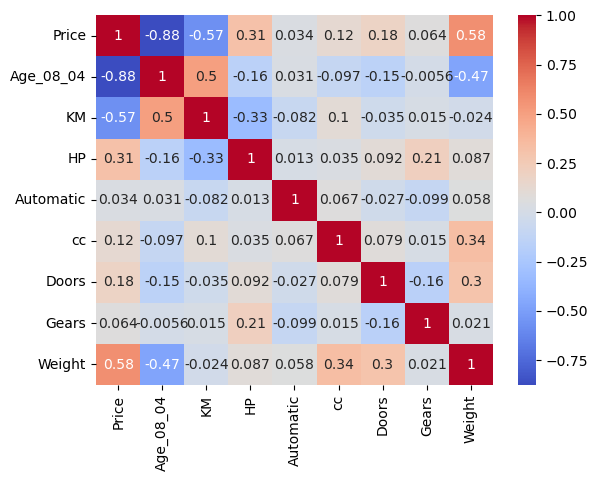

In [181]:
# identify patters using heatmap for correlation
sns.heatmap(corr,annot=True,cmap=plt.cm.coolwarm)
plt.show()

In [182]:
df1.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,0.055749,1576.560976,4.032753,5.026481,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,0.229517,424.387533,0.952667,0.188575,52.251882
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.000000,2.000000,3.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.000000,3.000000,5.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,0.000000,1600.000000,4.000000,5.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,0.000000,1600.000000,5.000000,5.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.000000,5.000000,6.000000,1615.000000


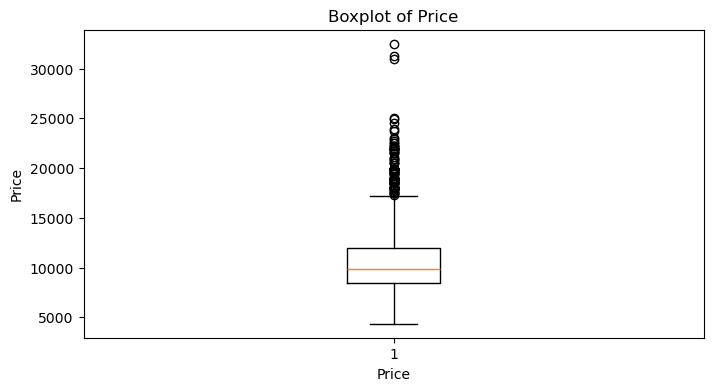

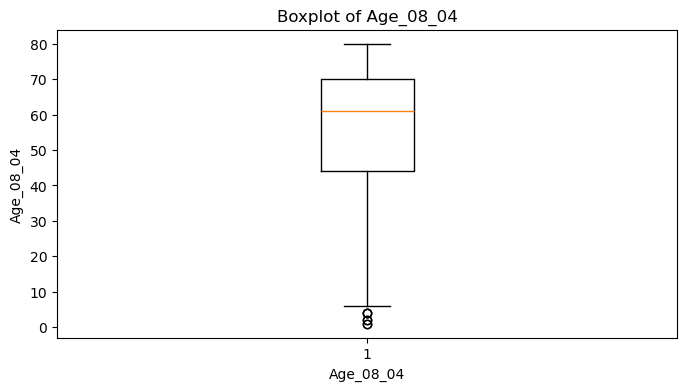

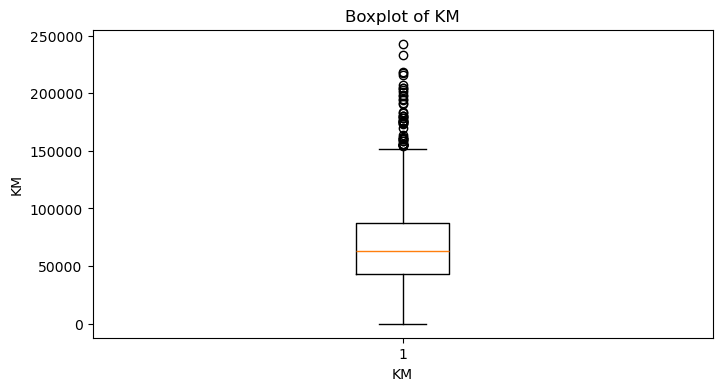

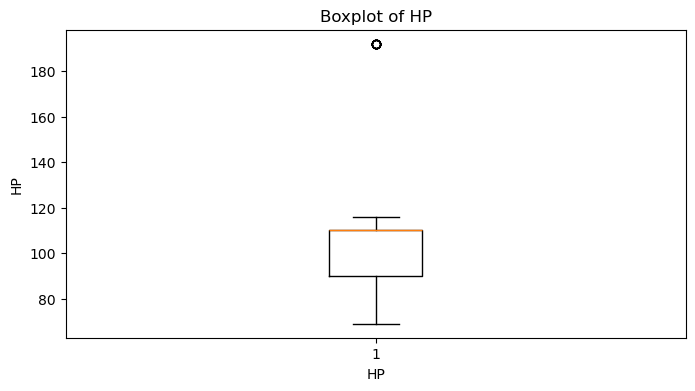

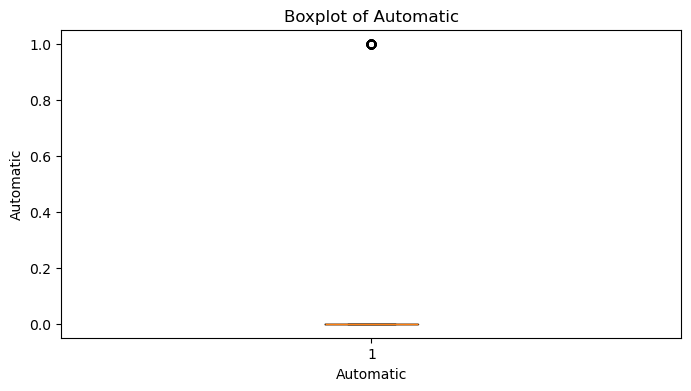

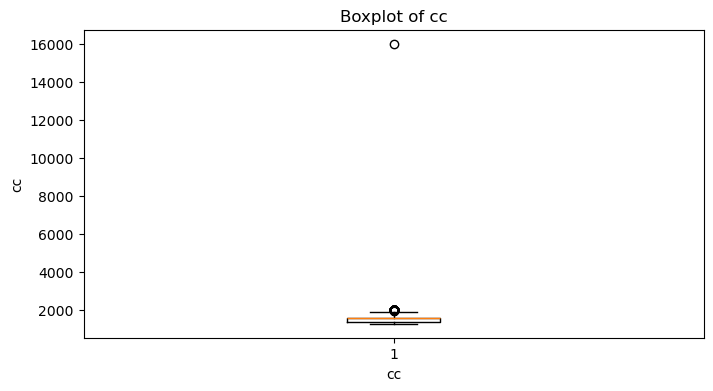

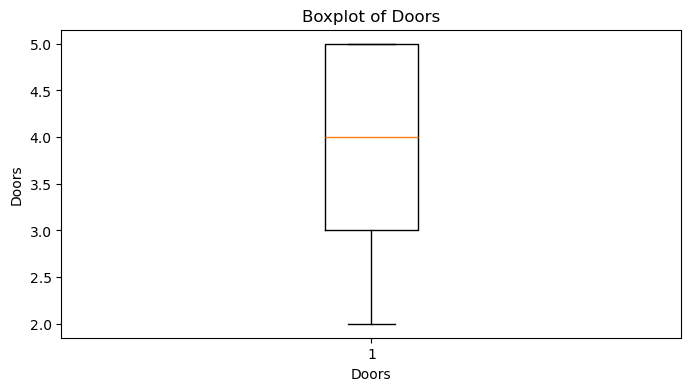

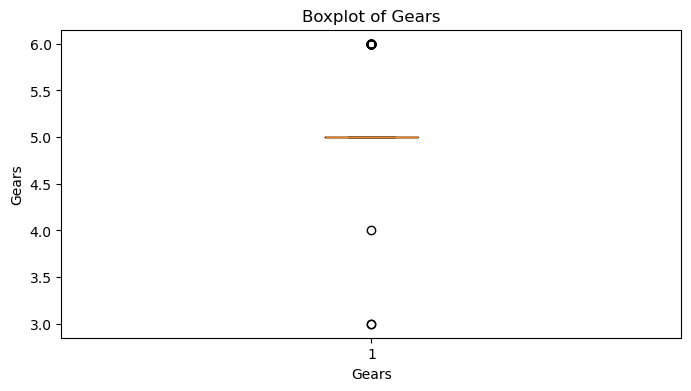

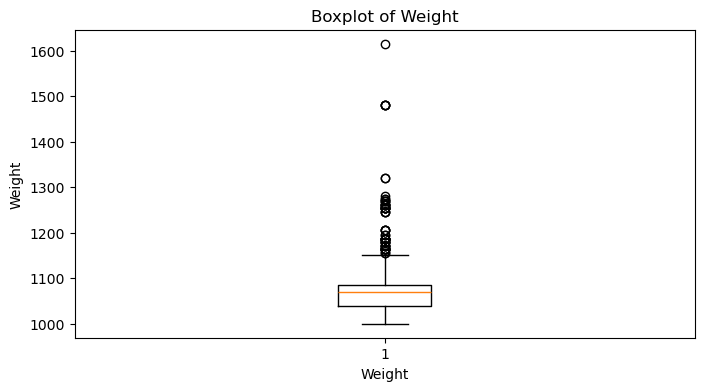

In [183]:
#for checking outliers using boxplot
for col in df1:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df1[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.xlabel(col)
    plt.show()

In [184]:
# numeric columns
numcol=[i for i in df1.columns if df1[i].dtype!='O']


In [185]:
# using INTER QUANTILE METHODS
q1=df1[numcol].quantile(0.25)
q3=df1[numcol].quantile(0.75)
IQR=q3-q1
low_ext=q1-1.5*IQR
upp_ext=q3+1.5*IQR
print('lower_extreme:',low_ext)
print('upper_extreme:',upp_ext)

lower_extreme: Price         3200.00
Age_08_04        5.00
KM          -23062.25
HP              60.00
Automatic        0.00
cc            1100.00
Doors            0.00
Gears            5.00
Weight         972.50
dtype: float64
upper_extreme: Price         17200.00
Age_08_04       109.00
KM           153103.75
HP              140.00
Automatic         0.00
cc             1900.00
Doors             8.00
Gears             5.00
Weight         1152.50
dtype: float64


In [186]:
#removing outliers
new_df=df1[(df1[numcol] >= low_ext) & (df1[numcol] <=upp_ext)]
print('Before removing outliers:',len(df1))
print('After removing outliers:',len(new_df))
print('Outliers:',len(df1)-len(new_df))

Before removing outliers: 1435
After removing outliers: 1435
Outliers: 0


In [187]:
#capping - change the outliers values to upper or lower values
new_df=df1.copy()

# Apply capping
df_capped = new_df.clip(lower=low_ext, upper=upp_ext, axis=1)
df2=df_capped

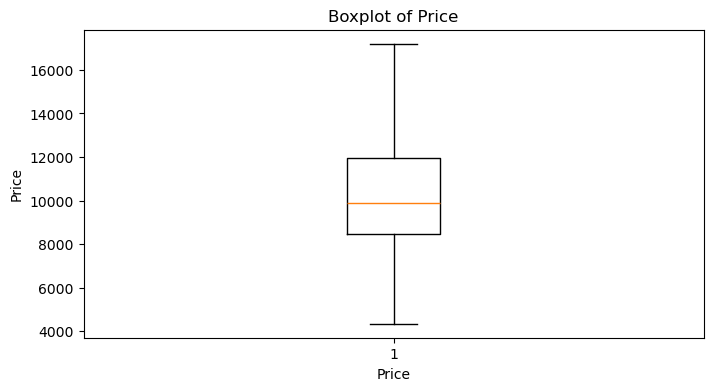

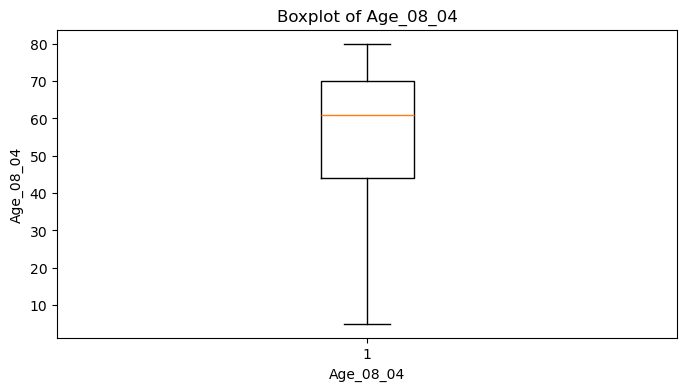

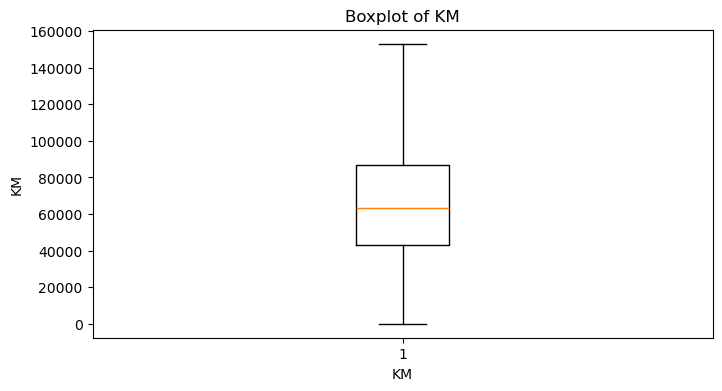

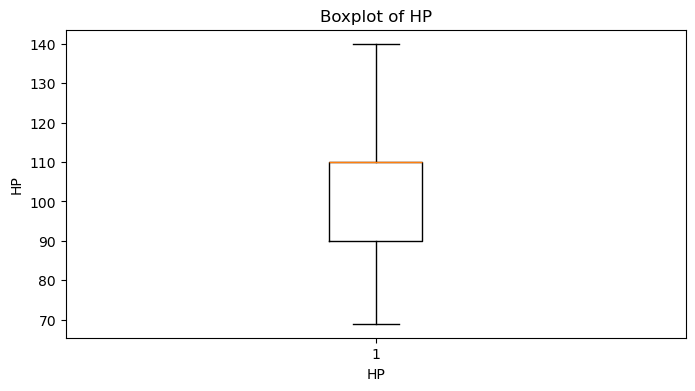

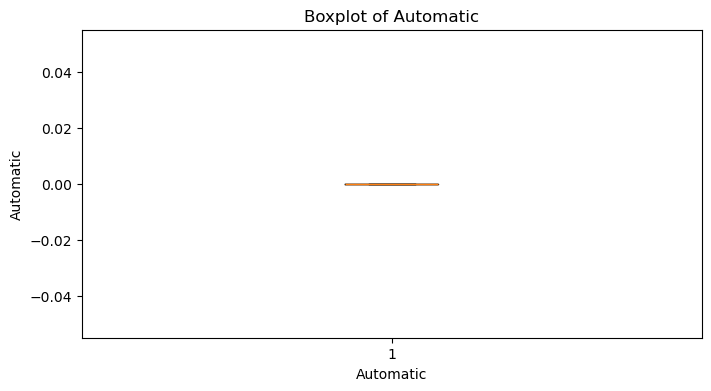

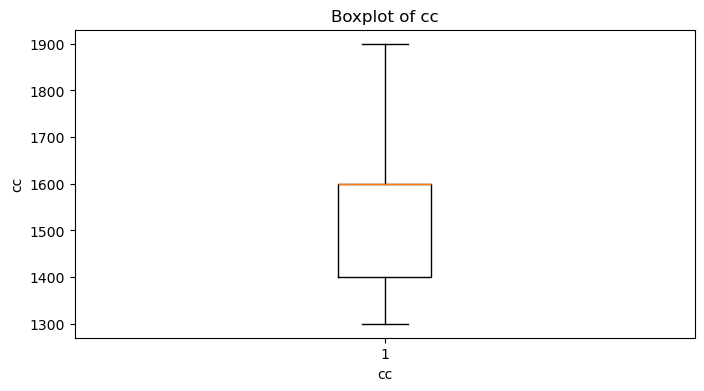

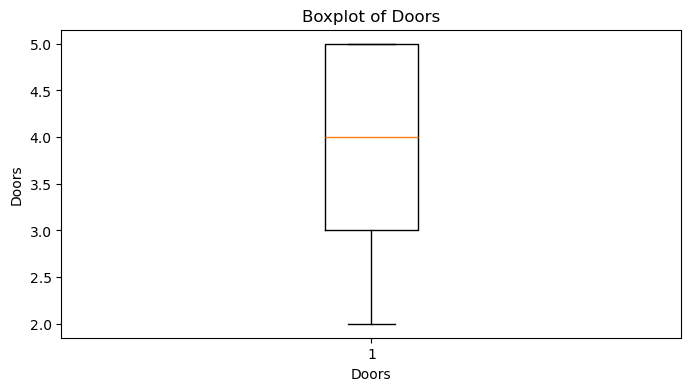

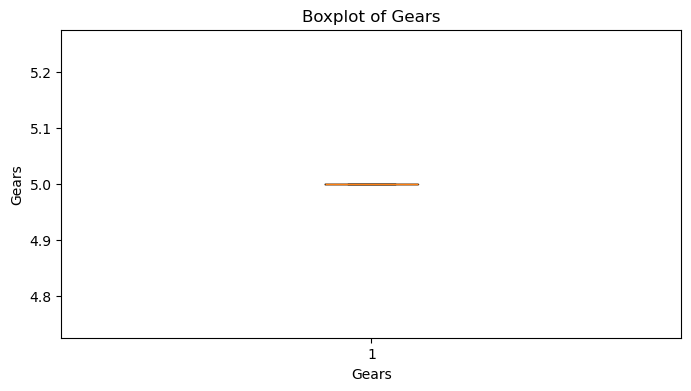

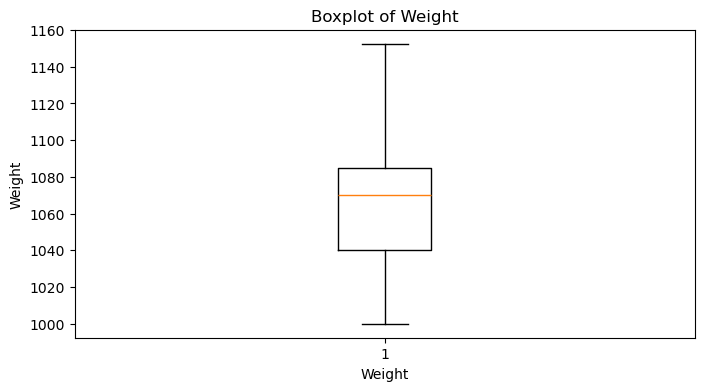

In [188]:
#for checking outliers after removing the outliers using boxplot
for col in df2:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df2[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.xlabel(col)
    plt.show()

In [189]:
#another method
#removing outliers using z-score
#def outlier_remove_z_score(df,columns):
#    thershold= 3
 #   z_score= stats.zscore(df[columns])
  #  return df[(abs(z_score)<thershold).all(axis=1)]
#df_new=outlier_remove_z_score(df,columns)    

In [190]:
#df_new.reset_index()
# i think IQR is better to perform for removing outliers

In [191]:
df2.shape

(1435, 9)

In [192]:
#again check the correlation
corr=df2[numcol].corr()
corr

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight
Price,1.000000,-0.895340,-0.607949,0.254427,NaN,0.129352,0.183010,NaN,0.507823
Age_08_04,-0.895340,1.000000,0.530670,-0.129602,NaN,-0.136644,-0.146704,NaN,-0.476150
KM,-0.607949,0.530670,1.000000,-0.329729,NaN,0.258680,-0.036618,NaN,0.000977
HP,0.254427,-0.129602,-0.329729,1.000000,NaN,0.098192,0.120139,NaN,0.024877
Automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,0.129352,-0.136644,0.258680,0.098192,NaN,1.000000,0.138433,NaN,0.717782
Doors,0.183010,-0.146704,-0.036618,0.120139,NaN,0.138433,1.000000,NaN,0.381177
Gears,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weight,0.507823,-0.476150,0.000977,0.024877,NaN,0.717782,0.381177,NaN,1.000000


In [193]:
# here droped the this two (NaN values) but drop in the original dataset
df3=df2.drop(columns=['Automatic','Gears'])
df3

,Price,Age_08_04,KM,HP,cc,Doors,Weight
0,13500,23,46986.0,90,1900,3,1152.5
1,13750,23,72937.0,90,1900,3,1152.5
2,13950,24,41711.0,90,1900,3,1152.5
3,14950,26,48000.0,90,1900,3,1152.5
4,13750,30,38500.0,90,1900,3,1152.5
...,...,...,...,...,...,...,...
1431,7500,69,20544.0,86,1300,3,1025.0
1432,10845,72,19000.0,86,1300,3,1015.0
1433,8500,71,17016.0,86,1300,3,1015.0
1434,7250,70,16916.0,86,1300,3,1015.0


In [194]:
df3.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10495.964460,55.992334,67644.520383,101.093380,1558.327526,4.032753,1068.520906
std,2977.598549,18.529725,34725.393258,13.146145,168.788311,0.952667,37.722708
min,4350.000000,5.000000,1.000000,69.000000,1300.000000,2.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,1085.000000
max,17200.000000,80.000000,153103.750000,140.000000,1900.000000,5.000000,1152.500000


In [195]:
corr1=df3.corr()

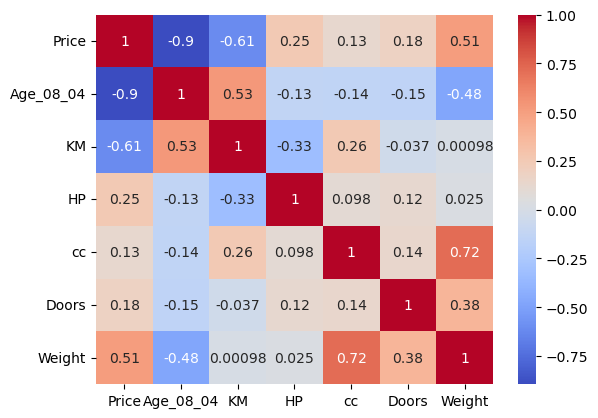

In [196]:
# patters
sns.heatmap(corr1,annot=True,cmap=plt.cm.coolwarm)
plt.show()

In [197]:
df3

,Price,Age_08_04,KM,HP,cc,Doors,Weight
0,13500,23,46986.0,90,1900,3,1152.5
1,13750,23,72937.0,90,1900,3,1152.5
2,13950,24,41711.0,90,1900,3,1152.5
3,14950,26,48000.0,90,1900,3,1152.5
4,13750,30,38500.0,90,1900,3,1152.5
...,...,...,...,...,...,...,...
1431,7500,69,20544.0,86,1300,3,1025.0
1432,10845,72,19000.0,86,1300,3,1015.0
1433,8500,71,17016.0,86,1300,3,1015.0
1434,7250,70,16916.0,86,1300,3,1015.0


In [198]:
#again for standardization the values
numcol1=[i for i in df3.columns if df3[i].dtype!='O']
numcol1

['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight']

In [199]:
#Standardization method
std_sca=StandardScaler()
df3[numcol1]=std_sca.fit_transform(df3[numcol1])
df3[numcol1]

,Price,Age_08_04,KM,HP,cc,Doors,Weight
0,1.009230,-1.781129,-0.595118,-0.844145,2.024972,-1.084443,2.226997
1,1.093220,-1.781129,0.152463,-0.844145,2.024972,-1.084443,2.226997
2,1.160412,-1.727143,-0.747078,-0.844145,2.024972,-1.084443,2.226997
3,1.496370,-1.619171,-0.565908,-0.844145,2.024972,-1.084443,2.226997
4,1.093220,-1.403226,-0.839578,-0.844145,2.024972,-1.084443,2.226997
...,...,...,...,...,...,...,...
1431,-1.006519,0.702234,-1.356844,-1.148522,-1.531016,-1.084443,-1.154108
1432,0.117261,0.864192,-1.401323,-1.148522,-1.531016,-1.084443,-1.419293
1433,-0.670561,0.810206,-1.458477,-1.148522,-1.531016,-1.084443,-1.419293
1434,-1.090508,0.756220,-1.461357,-1.148522,-1.531016,-1.084443,-1.419293


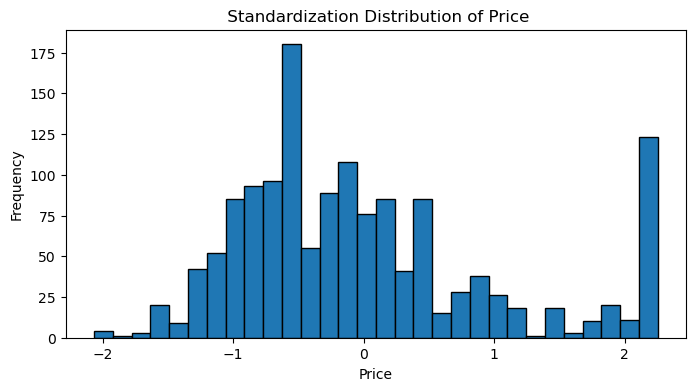

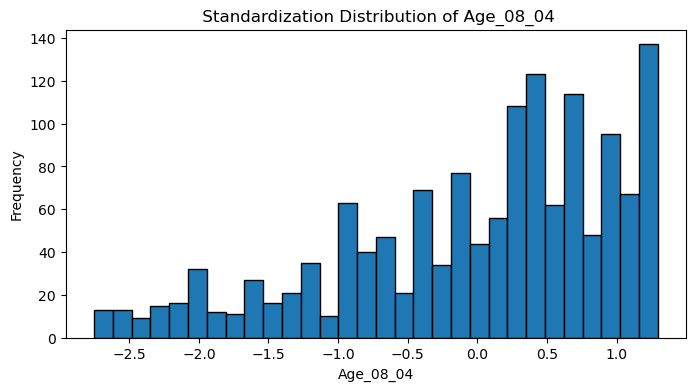

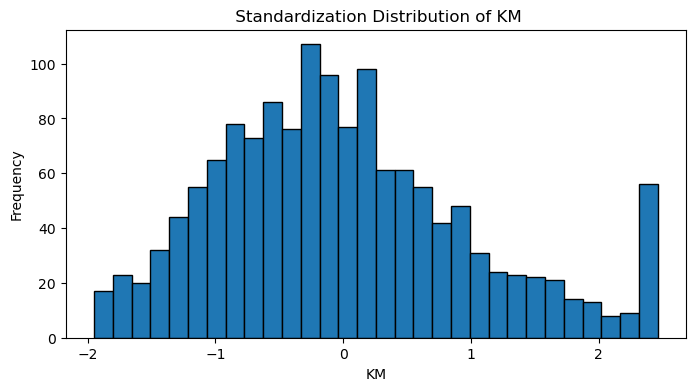

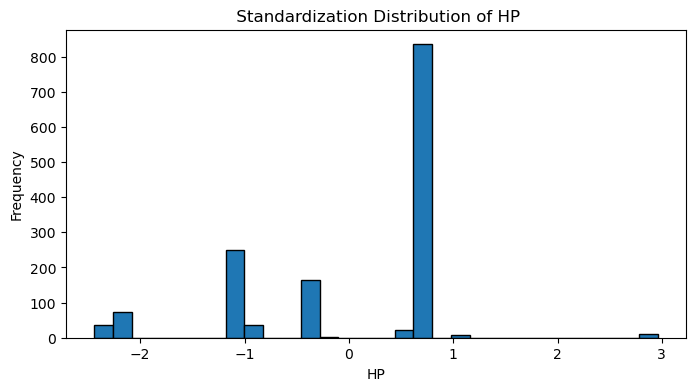

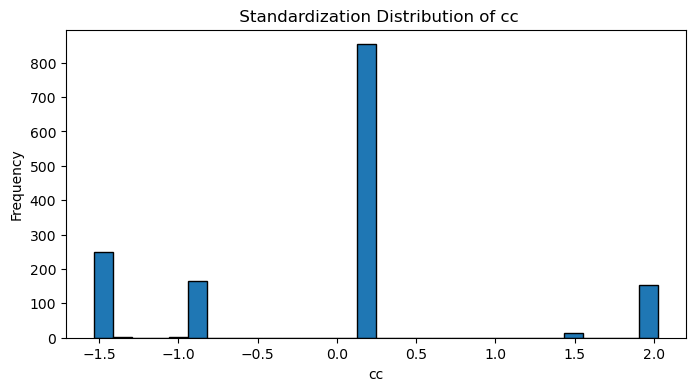

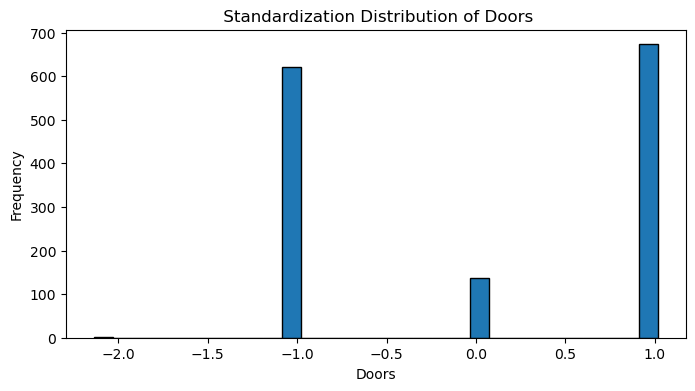

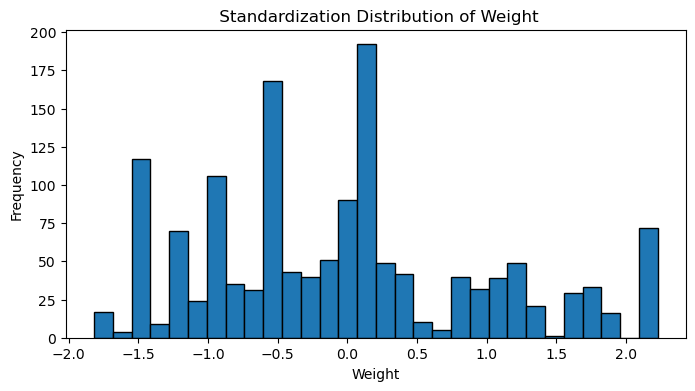

In [200]:
for col in df3[numcol1]:
    plt.figure(figsize=(8, 4))
    plt.hist(df3[col], bins=30, edgecolor='black')
    plt.title(f' Standardization Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

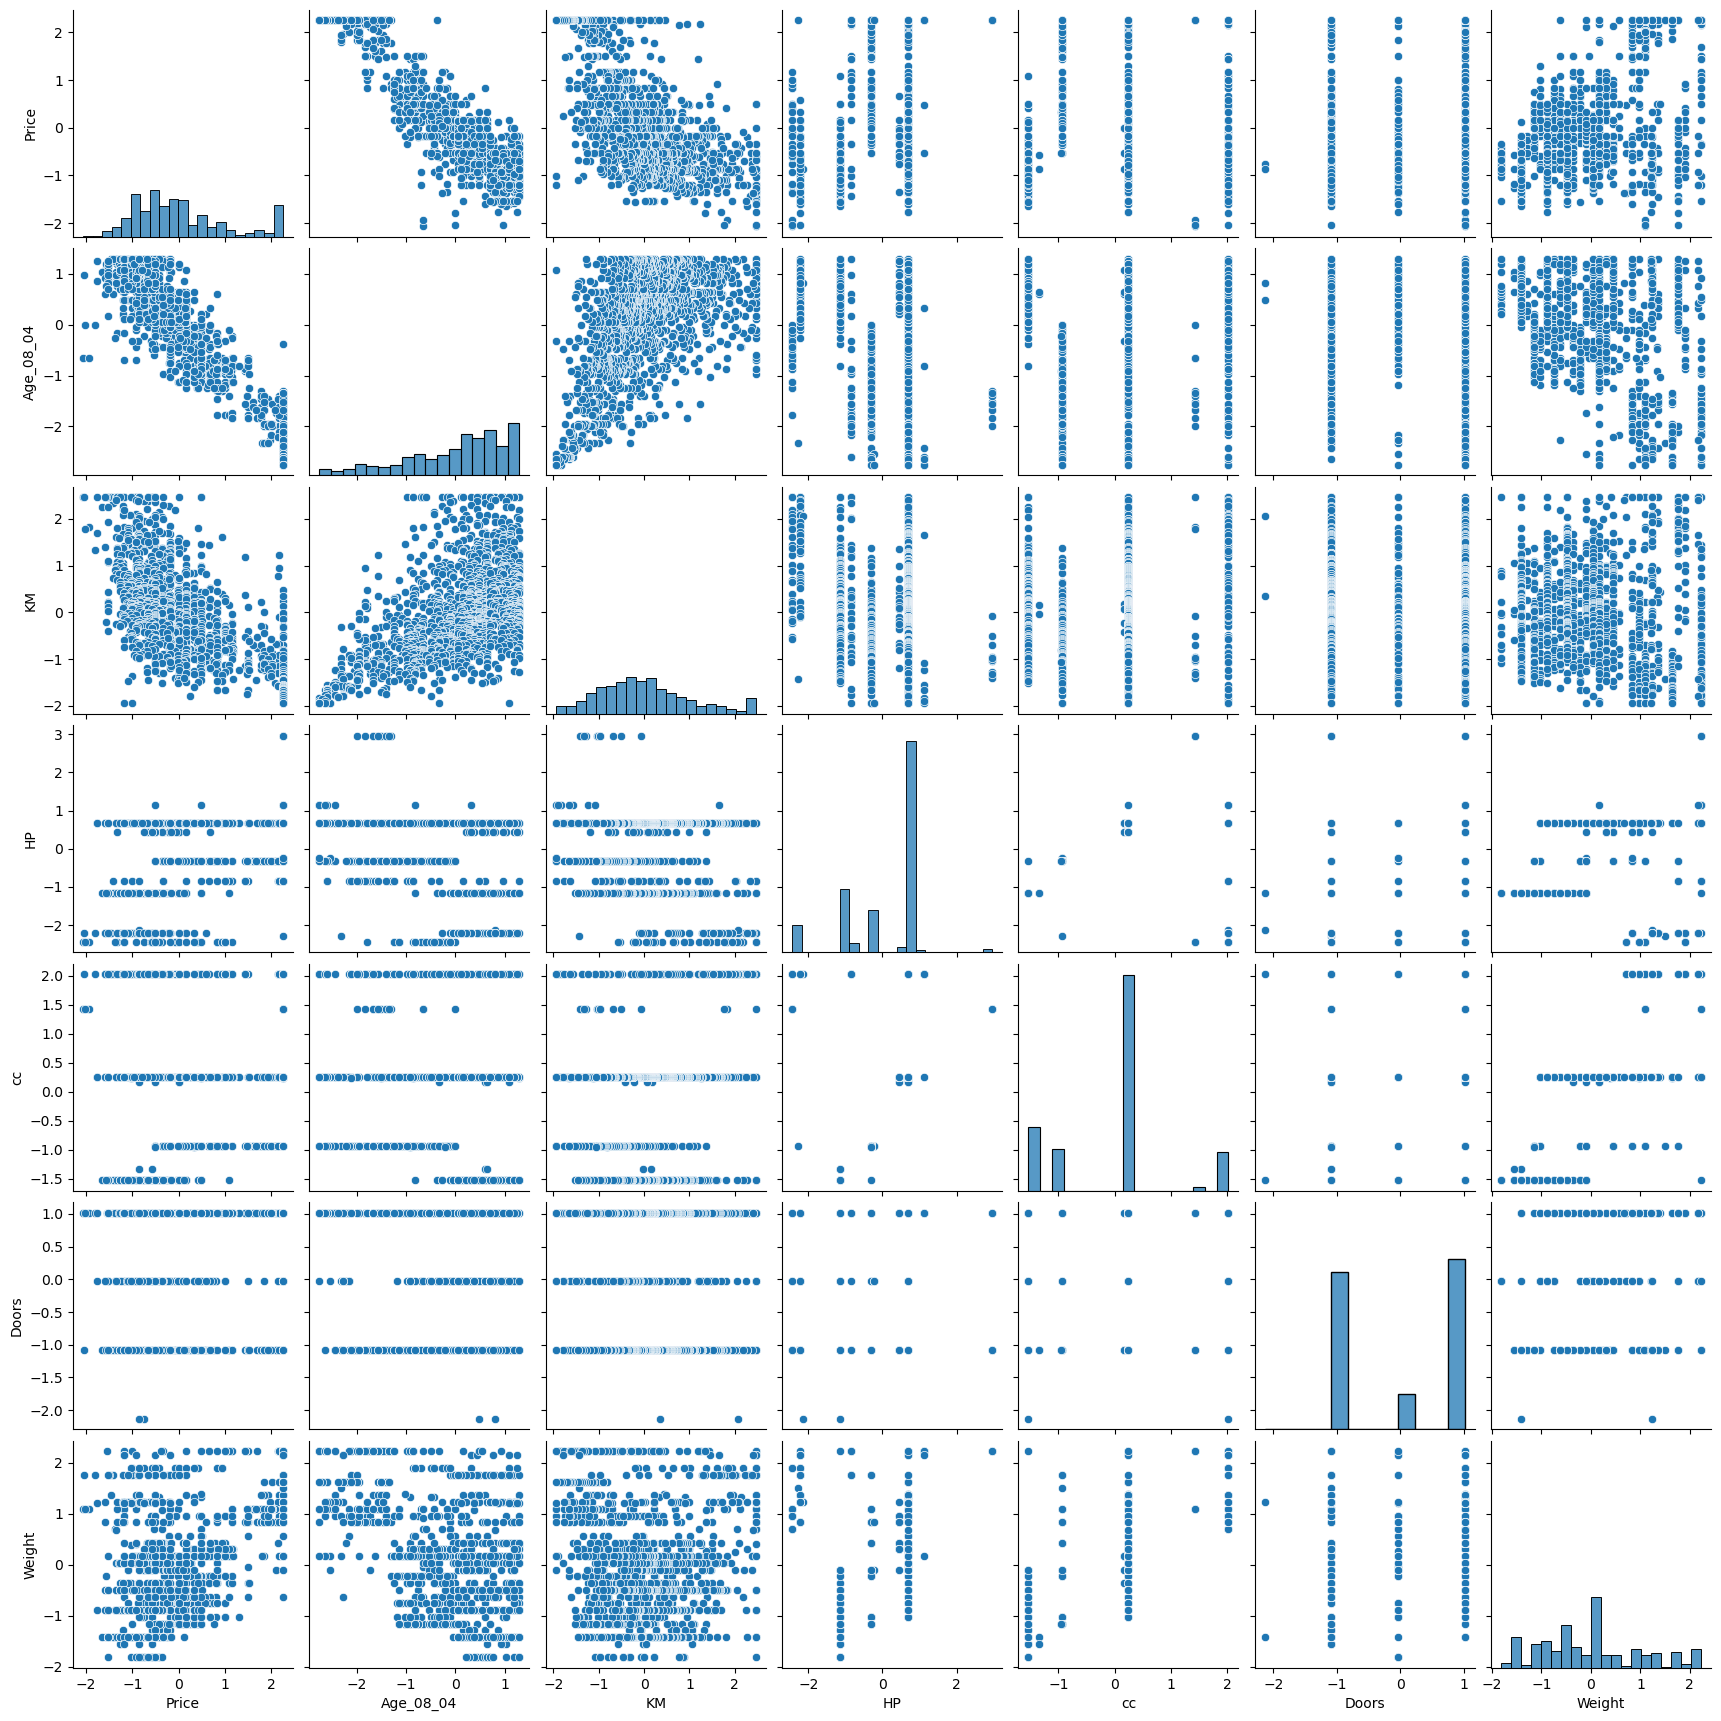

In [201]:
sns.pairplot(df3[numcol1])

# split the train and test

In [203]:
target=df3[['Price']]
features=df3.drop(columns='Price')
target.head(),features.head()

(      Price
 0  1.009230
 1  1.093220
 2  1.160412
 3  1.496370
 4  1.093220,
    Age_08_04        KM        HP        cc     Doors    Weight
 0  -1.781129 -0.595118 -0.844145  2.024972 -1.084443  2.226997
 1  -1.781129  0.152463 -0.844145  2.024972 -1.084443  2.226997
 2  -1.727143 -0.747078 -0.844145  2.024972 -1.084443  2.226997
 3  -1.619171 -0.565908 -0.844145  2.024972 -1.084443  2.226997
 4  -1.403226 -0.839578 -0.844145  2.024972 -1.084443  2.226997)

In [204]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.90,random_state=42)

In [205]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1291, 6)
(144, 6)
(1291, 1)
(144, 1)


In [206]:
#Build minimum of 3 different models.
#4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.
#5.Apply Lasso and Ridge methods on the model.

In [207]:
model1=LinearRegression() # model1 is trained
model1.fit(x_train,y_train)

# Predictions and evaluation
y_pred1=model1.predict(x_test)
mse1=mean_squared_error(y_test,y_pred1)
r2_1=r2_score(y_test,y_pred1)

print("Model 1 , MSE:", mse1)
print("Model 1 , R2:", r2_1)

Model 1 , MSE: 0.17564924451767241
Model 1 , R2: 0.8177969586116204


In [208]:
#2-MODEL
# For example, select highly correlated features manually
X_train_corr = x_train[['Age_08_04', 'Weight']]  # adjust based on correlation results
X_test_corr = x_test[['Age_08_04', 'Weight']]

model2 = LinearRegression()
model2.fit(X_train_corr, y_train)

# Predictions and evaluation
y_pred2 = model2.predict(X_test_corr)
mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

print("Model 2 , MSE:", mse2)
print("Model 2 , R2:", r2_2)


Model 2 , MSE: 0.4698181232018616
Model 2 , R2: 0.512652097184813


In [209]:
#3-MODEL
# Adding interaction terms or polynomial features
x_train['Age_08_04_Weight'] = x_train['Age_08_04'] * x_train['Weight']  #  interaction
x_test['Age_08_04_Weight'] = x_test['Age_08_04'] * x_test['Weight']

# Model with engineered features
model3 = LinearRegression()
model3.fit(x_train[['Age_08_04', 'Weight','Age_08_04_Weight']], y_train)

# Predictions and evaluation
y_pred3 = model3.predict(x_test[['Age_08_04', 'Weight', 'Age_08_04_Weight']])
mse3 = mean_squared_error(y_test, y_pred3)
r2_3 = r2_score(y_test, y_pred3)

print("Model 3 , MSE:", mse3)
print("Model 3 , R2:", r2_3)


Model 3 , MSE: 0.46537557184780454
Model 3 , R2: 0.5172604083133692


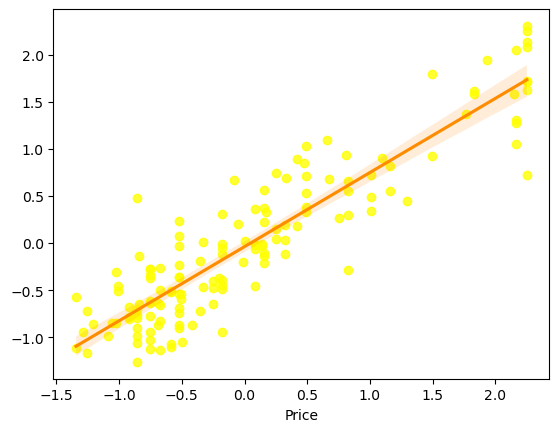

In [210]:
sns.regplot(data=df3,x=y_test,y=y_pred1,scatter_kws={'color':'yellow'},line_kws={'color':'darkorange'})
plt.show()

In [213]:
# ERROR METRICS
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model=LinearRegression()
model.fit(x_train,y_train)
# Predictions on the test set
y_pred = model.predict(x_test)  # 'model' is  trained model

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 0.3250396441161794
Mean Squared Error (MSE): 0.1746174265471238
Root Mean Squared Error (RMSE): 0.41787250034804135
R-squared (R2): 0.8188672756113284


In [215]:
# Lasso Regression
lasso = Lasso(alpha=0.1)  # You can adjust alpha based on cross-validation
lasso.fit(x_train, y_train)

# Predictions and evaluation for Lasso
y_pred_lasso = lasso.predict(x_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression , MAE:", mae_lasso)
print("Lasso Regression , MSE:", mse_lasso)
print("Lasso Regression , RMSE:", rmse_lasso)
print("Lasso Regression , R2:", r2_lasso)


Lasso Regression , MAE: 0.3201538003450016
Lasso Regression , MSE: 0.19172862911907945
Lasso Regression , RMSE: 0.43786827827450514
Lasso Regression , R2: 0.8011176225514242


In [217]:
# Ridge Regression
ridge = Ridge(alpha=0.9)  # Adjust alpha as needed
ridge.fit(x_train, y_train)

# Predictions and evaluation for Ridge
y_pred_ridge = ridge.predict(x_test)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression , MAE:", mae_ridge)
print("Ridge Regression , MSE:", mse_ridge)
print("Ridge Regression , RMSE:", rmse_ridge)
print("Ridge Regression , R2:", r2_ridge)



Ridge Regression , MAE: 0.3250545398311164
Ridge Regression , MSE: 0.1746404171034678
Ridge Regression , RMSE: 0.4179000084990042
Ridge Regression , R2: 0.818843427234977


In [273]:
#done

#### 1. What is Normalization & Standardization, and how is it helpful?

### 2. What techniques can be used to address multicollinearity in multiple linear regression?